<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/Estadistica/TP1/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística para Ciencia de los Datos
# Trabajo práctico 1

- Professor: Jorge Castro.

- Student:  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- September 15th, 2019   

In [0]:
# Libraries required for the exercises
import torch as torch
import numpy as np
import random
import math

from scipy.stats import norm
from scipy.stats import uniform
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy import linalg as linalg


# 1) Muestreo de estaturas (10 puntos)



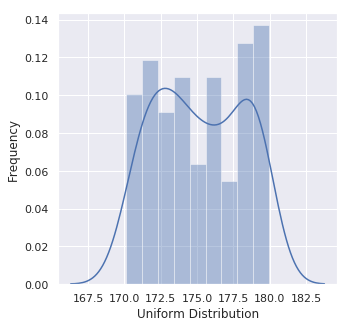

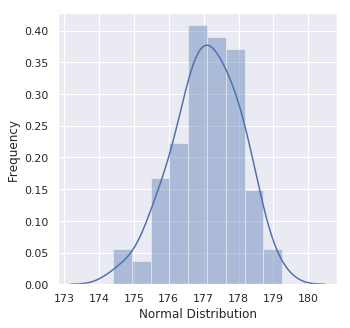

In [34]:
# Exercise 1
def plotting_data(data, title):
  # Settings for seaborn plotting style and sizes
  sns.set(color_codes=True)
  sns.set(rc={'figure.figsize':(5,5)})
  
  # Muestro los datos en un histograma (bins = cubetas)
  ax = sns.distplot(data, bins=9, kde=True)
  ax.set(xlabel=title, ylabel='Frequency')
  
  plt.show()

def muestreo_uniforme(estatura_minima, estatura_maxima, cantidad_observaciones=100):
  # Random numbers from uniform distribution
  n = cantidad_observaciones
  start = estatura_minima
  width = estatura_maxima - estatura_minima
  uniform_data = uniform.rvs(size=n, loc = start, scale=width)
  
  # Muestro los datos en un histograma (bins = cubetas)
  plotting_data(uniform_data, "Uniform Distribution")
  
  return uniform_data

def muestreo_normal(media, desviacion_estandar, cantidad_observaciones=100, plot=True):
  normal_data = norm.rvs(size=cantidad_observaciones, loc=media, scale=desviacion_estandar)
  
  if plot == True:
    # Muestro los datos en un histograma (bins = cubetas)
    plotting_data(normal_data, "Normal Distribution")
  
  return normal_data
  
# Test exercise 1
uniform_data = muestreo_uniforme(estatura_minima=170, estatura_maxima=180, cantidad_observaciones=100)
normal_data  = muestreo_normal(media=177, desviacion_estandar=1, cantidad_observaciones=100)

# 2) Evaluación de la función de verosimilitud normal (10 puntos)



In [44]:
## Exercise 2
def evaluacion_verosimilitud_normal(muestras, media, desviacion_estandar):
    n = len(muestras)
    
    # Se evalua la verosimilitud
    funcion_probabilidad_densidad = norm(media, desviacion_estandar).pdf(muestras)
    probabilidad_conjunta = np.prod(funcion_probabilidad_densidad)
    print("Para una media=%d, desviacion_estandar=%d, el valor de probabilidad conjunta es: " % (media, desviacion_estandar), probabilidad_conjunta)
    
    return probabilidad_conjunta
  
# Test exercise2
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 176, desviacion_estandar = 3)
verosimilitud = evaluacion_verosimilitud_normal(uniform_data, media = 176, desviacion_estandar = 3)

Para una media=176, desviacion_estandar=3, el valor de probabilidad conjunta es:  1.9535454963636966e-93
Para una media=176, desviacion_estandar=3, el valor de probabilidad conjunta es:  1.345569441419829e-111


# 3) Función de verosimilitud cuando aumentamos la cantidad de observaciones en varios órdenes de magnitud (10 puntos)



In [61]:
## Exercise 3
def evaluacion_verosimilitud_normal_con_logaritmo_natural(muestras, media, desviacion_estandar):
    n = len(muestras)
    
    # Se evalua la verosimilitud
    varianza    = desviacion_estandar**2
    first_term  = (-1/(2 * (varianza))) * np.sum((muestras-media)**2)
    second_term = (-n/2) * math.log(2 * math.pi)
    third_term  = (-n/2) * math.log(varianza)
    verosimilitud = first_term + second_term + third_term
    print("Para una media=%d, desviacion_estandar=%d, el valor del logaritmo de la verosimilitud es: " % (media, desviacion_estandar), verosimilitud)
    
    # Para obtener la probabilidad se aplica la exponencial
    probabilidad = np.exp(verosimilitud)
    print("Para una media=%d, desviacion_estandar=%d, el valor de probabilidad es: " % (media, desviacion_estandar), probabilidad, "\n")
    
    return verosimilitud, probabilidad
  
# Test exercise3

print("Con pequeñas observaciones se observa que se mantiene la precisión: \n")
normal_data  = muestreo_normal(media=177, desviacion_estandar=1, cantidad_observaciones=50, plot=False)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 177, desviacion_estandar = 1)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 176, desviacion_estandar = 3)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 174, desviacion_estandar = 1)

print("\nSin embargo, cuando son muchisimas observaciones se pierde la precisión ya que son tantas multiplicaciones de números tan pequeños que hacen")
print("que el resultado de la probabilidad sea cero. Tal y como se observa a continuación: \n")
normal_data  = muestreo_normal(media=177, desviacion_estandar=1, cantidad_observaciones=100000, plot=False)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 177, desviacion_estandar = 1)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 176, desviacion_estandar = 3)
verosimilitud = evaluacion_verosimilitud_normal(normal_data,  media = 174, desviacion_estandar = 1)

print("\nY por eso la solución es aplicarle el logaritmo natural a la funcion de verosimilitud y de esta forma poder observar") 
print("de una mejor manera cuales valores de la media y la desviacion estandar se aproximan más. Y lo podemos ver con los siguientes ejemplos: \n")
normal_data  = muestreo_normal(media=177, desviacion_estandar=1, cantidad_observaciones=100000, plot=False)
verosimilitud, probabilidad = evaluacion_verosimilitud_normal_con_logaritmo_natural(normal_data, media = 177, desviacion_estandar = 1)
verosimilitud, probabilidad = evaluacion_verosimilitud_normal_con_logaritmo_natural(normal_data, media = 176, desviacion_estandar = 3)
verosimilitud, probabilidad = evaluacion_verosimilitud_normal_con_logaritmo_natural(normal_data, media = 174, desviacion_estandar = 1)


Con pequeñas observaciones se observa que se mantiene la precisión: 

Para una media=177, desviacion_estandar=1, el valor de probabilidad conjunta es:  2.8534942768890353e-33
Para una media=176, desviacion_estandar=3, el valor de probabilidad conjunta es:  2.1220045694154356e-47
Para una media=174, desviacion_estandar=1, el valor de probabilidad conjunta es:  6.149489829685862e-138

Sin embargo, cuando son muchisimas observaciones se pierde la precisión ya que son tantas multiplicaciones de números tan pequeños que hacen
que el resultado de la probabilidad sea cero. Tal y como se observa a continuación: 

Para una media=177, desviacion_estandar=1, el valor de probabilidad conjunta es:  0.0
Para una media=176, desviacion_estandar=3, el valor de probabilidad conjunta es:  0.0
Para una media=174, desviacion_estandar=1, el valor de probabilidad conjunta es:  0.0

Y por eso la solución es aplicarle el logaritmo natural a la funcion de verosimilitud y de esta forma poder observar
de una mejo

# 4) Valores óptimos para maximizar la función de verosimilitud normal (10 puntos)



In [68]:
## Exercise 4
def calculate_optimal_mean(samples):
  return samples.sum()/len(samples)

def calculate_optimal_variance(samples, mean):
  return (np.power(samples - mean, 2)).sum()/len(samples)

def calculate_optimal_standard_deviation(variance):
  return np.sqrt(variance)

def get_optimal_values(samples):
  mean     = calculate_optimal_mean(samples)
  variance = calculate_optimal_variance(samples, mean)
  return mean, calculate_optimal_standard_deviation(variance)

# Test exercise4
normal_data  = muestreo_normal(media=177, desviacion_estandar=1, cantidad_observaciones=10000, plot=False)
mean, standard_deviation = get_optimal_values(normal_data)
print("Optimal Mean: ", mean)
print("Optimal Standard Deviation: ", standard_deviation)

Optimal Mean:  176.99064103428782
Optimal Standard Deviation:  0.9951858542154861


# 5) Valores óptimos para maximizar la función de verosimilitud normal (10 puntos)



In [69]:
## Exercise 5
MEAN = 170
STANDARD_DEVIATION = 1

def generate_samples(number_of_samples=10000, observations=50):
  samples = []
  for x in range(number_of_samples):
    sample = muestreo_normal(media=MEAN, desviacion_estandar=STANDARD_DEVIATION, cantidad_observaciones=observations, plot=False)
    samples.append(sample)
  return samples

def calculate_optimal_variance_small_samples(samples, mean):
  return (np.power(samples - mean, 2)).sum()/(len(samples) - 1)

def calculate_samples_optimal_variance(samples, biased_estimate=True):
  samples_variance = []
  for sample in samples:
    mean     = calculate_optimal_mean(sample)
    variance = calculate_optimal_variance(sample, mean) if biased_estimate else calculate_optimal_variance_small_samples(sample, mean)
    samples_variance.append(variance)
  return samples_variance

def calculate_samples_average_variance_value(samples_variance):
  return sum(samples_variance)/len(samples_variance)

def iterate_exercise5(number_of_iterations=10, biased_estimate=True):
  for i in range(0, number_of_iterations):
    samples                        = generate_samples(number_of_samples=10000, observations=50)
    samples_variance               = calculate_samples_optimal_variance(samples, biased_estimate)
    samples_average_variance_value = calculate_samples_average_variance_value(samples_variance)
    print("Para la iteracion=%d se obtiene una varianza promedio de %f" % (i, samples_average_variance_value))

# Test exercise5
iterate_exercise5(number_of_iterations=10, biased_estimate=True)

# Es necesario hacer una corrección en este caso para el cálculo del valor óptimo de la varianza
print("\nComo se observa en la iteración, es necesario hacer una correccion al calculo de la varianza")
print("ya que se esta utilizando la estimacion sesgada, y el numero de observaciones que se tienen en este ejercicio es muy pequeño")
print("por lo que es necesario utilizar la estimacion no sesgada. El resultado de utilizar la estimacion no sesgada se observa a continuacion:\n")

# Usando estimacion no sesgada
iterate_exercise5(number_of_iterations=10, biased_estimate=False)

print("\nSe observa como ahora sí la varianza promedio se aproxima de manera correcta a la varianza esperada.")

Para la iteracion=0 se obtiene una varianza promedio de 0.979038
Para la iteracion=1 se obtiene una varianza promedio de 0.981166
Para la iteracion=2 se obtiene una varianza promedio de 0.976592
Para la iteracion=3 se obtiene una varianza promedio de 0.981116
Para la iteracion=4 se obtiene una varianza promedio de 0.982008
Para la iteracion=5 se obtiene una varianza promedio de 0.981192
Para la iteracion=6 se obtiene una varianza promedio de 0.977700
Para la iteracion=7 se obtiene una varianza promedio de 0.980590
Para la iteracion=8 se obtiene una varianza promedio de 0.978659
Para la iteracion=9 se obtiene una varianza promedio de 0.978573

Como se observa en la iteración, es necesario hacer una correccion al calculo de la varianza
ya que se esta utilizando la estimacion sesgada, y el numero de observaciones que se tienen en este ejercicio es muy pequeño
por lo que es necesario utilizar la estimacion no sesgada. El resultado de utilizar la estimacion no sesgada se observa a continuac